In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
from PIL import Image
import glob
import random
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.transforms import ToTensor, Resize
import torch.nn as nn
import torch.nn.parallel
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms

<h1>Question 1</h1>

In [2]:
df = pd.read_csv("../Assignment3/Grocery_Items_24.csv") 

In [4]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Assuming you have a DataFrame called 'df' with the transaction data

# Encode the data as binary values (0 or 1)
df_encoded = df.applymap(lambda x: 1 if x else 0)

# Perform Apriori algorithm with a minimum support of 0.01
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules with a minimum confidence of 0.1
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Print the association rules
print(association_rules_df)


C:\Users\kaasa\AppData\Local\Temp\ipykernel_2400\2478680847.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df.applymap(lambda x: 1 if x else 0)
c:\Users\kaasa\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


       antecedents                      consequents  antecedent support  \
0              (1)                              (0)                 1.0   
1              (0)                              (1)                 1.0   
2              (2)                              (0)                 1.0   
3              (0)                              (2)                 1.0   
4              (0)                              (3)                 1.0   
...            ...                              ...                 ...   
173047         (9)  (2, 1, 6, 8, 3, 7, 10, 0, 4, 5)                 1.0   
173048        (10)   (2, 1, 6, 8, 3, 7, 9, 0, 4, 5)                 1.0   
173049         (0)  (2, 1, 6, 8, 3, 7, 9, 10, 4, 5)                 1.0   
173050         (4)  (2, 1, 6, 8, 3, 7, 9, 10, 0, 5)                 1.0   
173051         (5)  (2, 1, 6, 8, 3, 7, 9, 10, 0, 4)                 1.0   

        consequent support  support  confidence  lift  leverage  conviction  \
0                   

In [7]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame (assuming it's named 'df')

# Encode the data as binary values (0 or 1)
df_encoded = df.applymap(lambda x: 1 if x else 0)

# Specify the msv and mct values
msv_values = [0.001, 0.005, 0.01, 0.05]
mct_values = [0.05, 0.075, 0.1]

# Create an empty dictionary to store the count results
count_results = {}

# Iterate over the msv and mct values
for msv in msv_values:
    for mct in mct_values:
        # Perform Apriori algorithm with the current msv and mct
        frequent_itemsets = apriori(df_encoded, min_support=msv, use_colnames=True)
        association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=mct)
        
        # Count the number of association rules
        count_results[(msv, mct)] = len(association_rules_df)

# Create a DataFrame from the count results
count_df = pd.DataFrame(count_results, index=[1])  # Set an arbitrary index, in this case, [1]
count_df.columns = mct_values

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(count_df, annot=True, cmap="YlGnBu", fmt="g", cbar=True)
plt.xlabel("Minimum Confidence Threshold (mct)")
plt.ylabel("Minimum Support Value (msv)")
plt.title("Association Rule Counts Heatmap")
plt.show()


C:\Users\kaasa\AppData\Local\Temp\ipykernel_2400\2629326324.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df.applymap(lambda x: 1 if x else 0)
c:\Users\kaasa\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\kaasa\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
c:\Users\kaasa\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool type

ValueError: Length mismatch: Expected axis has 12 elements, new values have 3 elements

<h1>Question 2</h1>


In [2]:
def image_loader(path):
    img =  cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = img.reshape(3,331,331)
    return img

In [3]:
# mapping labels to 0 to 3 for all the four classes
labmap = {0: "n02089078-black-and-tan_coonhound"
          ,1: "n02091831-Saluki"
          ,2:"n02092002-Scottish_deerhound"
          ,3:"n02095314-wire-haired_fox_terrier"} 

BATCH_SIZE = 16

data_set = dset.ImageFolder(root="../DataSet/ProcessedDatasets/",loader = image_loader) # should we add any transforms or split in



torch.Size([3, 331, 331])
<class 'torch.Tensor'>


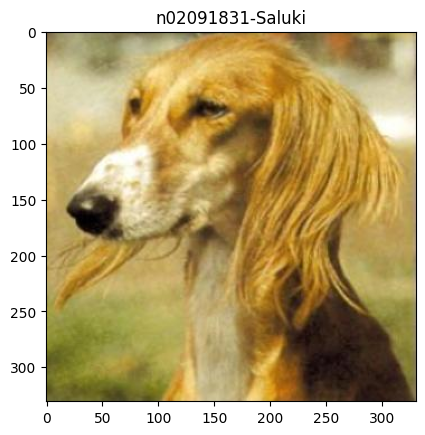

In [4]:
# for testing the data loader
Train_Loader =  DataLoader(dataset=data_set,shuffle=True,batch_size=BATCH_SIZE)

for img,label in Train_Loader:
    print(img[0].shape)
    plt.imshow(img[0].reshape(331,331,3))
    plt.title(labmap[int(label[0])])
    print(type(img[0]))
    break

In [5]:
class CNN(nn.Module):
    def __init__(self) -> None:
        super(CNN, self).__init__()
        self.Layer1 = nn.Conv2d(3,8,kernel_size=(3,3),bias=True)
        self.max_pool = nn.MaxPool2d(kernel_size=(2,2))
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(8*164*164,16)
        self.fc = nn.Linear(16,4)
        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.Layer1(x.float())
        x = self.relu(x) # should be after max_pool or before?
        x = self.max_pool(x)
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.fc(x)
        return nn.functional.softmax(x)

In [6]:
class CNN5(nn.Module):
    def __init__(self) -> None:
        super(CNN5, self).__init__()
        self.Layer1 = nn.Conv2d(3,8,kernel_size=(5,5),bias=True)
        self.max_pool = nn.MaxPool2d(kernel_size=(2,2))
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(8*163*163,16) 
        self.fc = nn.Linear(16,4)
        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.Layer1(x.float())
        x = self.relu(x) # should be after max_pool or before?
        x = self.max_pool(x)
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.fc(x)
        return nn.functional.softmax(x)

In [7]:
class CNN7(nn.Module):
    def __init__(self) -> None:
        super(CNN7, self).__init__()
        self.Layer1 = nn.Conv2d(3,8,kernel_size=(7,7),bias=True) 
        self.max_pool = nn.MaxPool2d(kernel_size=(2,2))
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(8*162*162,16)
        self.fc = nn.Linear(16,4)
        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.Layer1(x.float())
        x = self.relu(x) # should be after max_pool or before?
        x = self.max_pool(x)
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.fc(x)
        return nn.functional.softmax(x)

C:\Users\kaasa\AppData\Local\Temp\ipykernel_8048\3128327557.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(x)


Epoch 1/10, Training Loss: 1.3437, Training Accuracy: 24.21%, Validation Loss: 1.4099, Validation Accuracy: 32.89%
Epoch 2/10, Training Loss: 1.3437, Training Accuracy: 25.21%, Validation Loss: 1.4099, Validation Accuracy: 32.89%
Epoch 3/10, Training Loss: 1.3437, Training Accuracy: 25.21%, Validation Loss: 1.4099, Validation Accuracy: 32.89%
Epoch 4/10, Training Loss: 1.3437, Training Accuracy: 25.21%, Validation Loss: 1.4099, Validation Accuracy: 32.89%
Epoch 5/10, Training Loss: 1.3437, Training Accuracy: 25.21%, Validation Loss: 1.4099, Validation Accuracy: 32.89%
Epoch 6/10, Training Loss: 1.3437, Training Accuracy: 25.21%, Validation Loss: 1.4099, Validation Accuracy: 32.89%
Epoch 7/10, Training Loss: 1.3437, Training Accuracy: 25.21%, Validation Loss: 1.4099, Validation Accuracy: 32.89%
Epoch 8/10, Training Loss: 1.3437, Training Accuracy: 25.21%, Validation Loss: 1.4099, Validation Accuracy: 32.89%
Epoch 9/10, Training Loss: 1.3437, Training Accuracy: 25.21%, Validation Loss: 1

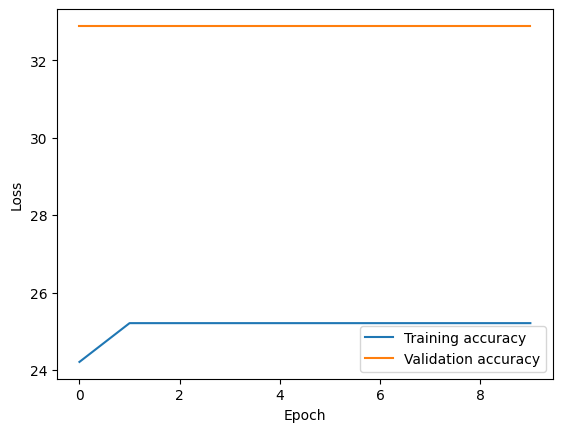

In [8]:
train_data,val_data = random_split(data_set, [0.8, 0.2])

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)



device = 'cuda' 
model_3 = CNN().to(device)

optimizer = optim.Adam(model_3.parameters(), lr=1e-4)
num_epochs = 10
training_losses = []
training_accuracies = []
validation_losses = []
validation_accuracies = []
for epoch in range(num_epochs):
    model_3.train()
    train_correct = 0
    train_total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        #optimizer.zero_grad()  # Clear gradients
        outputs = model_3(images)
        loss = F.cross_entropy( outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    training_losses.append(loss.item())
    training_accuracies.append(100 * train_correct / train_total)

    # Validation loop
    model_3.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model_3(images)
            loss = F.cross_entropy(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    validation_losses.append(val_loss / len(val_loader))
    validation_accuracies.append(100 * val_correct / val_total)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {loss.item():.4f}, Training Accuracy: {100 * train_correct / train_total:.2f}%, Validation Loss: {val_loss / len(val_loader):.4f}, Validation Accuracy: {100 * val_correct / val_total:.2f}%')
plt.plot(training_accuracies, label='Training accuracy')
plt.plot(validation_accuracies, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

C:\Users\kaasa\AppData\Local\Temp\ipykernel_8048\950639591.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(x)


Epoch 1/10, Training Loss: 1.1437, Training Accuracy: 29.72%, Validation Loss: 1.4337, Validation Accuracy: 28.86%
Epoch 2/10, Training Loss: 1.1437, Training Accuracy: 31.55%, Validation Loss: 1.4337, Validation Accuracy: 28.86%
Epoch 3/10, Training Loss: 1.1437, Training Accuracy: 31.55%, Validation Loss: 1.4337, Validation Accuracy: 28.86%
Epoch 4/10, Training Loss: 1.1437, Training Accuracy: 31.55%, Validation Loss: 1.4337, Validation Accuracy: 28.86%
Epoch 5/10, Training Loss: 1.1437, Training Accuracy: 31.55%, Validation Loss: 1.4337, Validation Accuracy: 28.86%
Epoch 6/10, Training Loss: 1.1437, Training Accuracy: 31.55%, Validation Loss: 1.4337, Validation Accuracy: 28.86%
Epoch 7/10, Training Loss: 1.1437, Training Accuracy: 31.55%, Validation Loss: 1.4337, Validation Accuracy: 28.86%
Epoch 8/10, Training Loss: 1.1437, Training Accuracy: 31.55%, Validation Loss: 1.4337, Validation Accuracy: 28.86%
Epoch 9/10, Training Loss: 1.1437, Training Accuracy: 31.55%, Validation Loss: 1

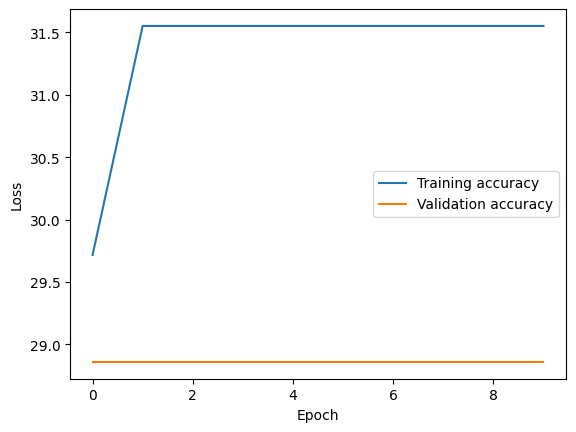

In [9]:
train_data,val_data = random_split(data_set, [0.8, 0.2])

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=False)



device = 'cuda' 
model_5 = CNN5().to(device)

optimizer = optim.Adam(model_5.parameters(), lr=1e-4)
num_epochs = 10
training_losses = []
training_accuracies = []
validation_losses = []
validation_accuracies = []
for epoch in range(num_epochs):
    model_5.train()
    train_correct = 0
    train_total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        #optimizer.zero_grad()  # Clear gradients
        outputs = model_5(images)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    training_losses.append(loss.item())
    training_accuracies.append(100 * train_correct / train_total)

    # Validation loop
    model_5.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model_5(images)
            loss = F.cross_entropy(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    validation_losses.append(val_loss / len(val_loader))
    validation_accuracies.append(100 * val_correct / val_total)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {loss.item():.4f}, Training Accuracy: {100 * train_correct / train_total:.2f}%, Validation Loss: {val_loss / len(val_loader):.4f}, Validation Accuracy: {100 * val_correct / val_total:.2f}%')
plt.plot(training_accuracies, label='Training accuracy')
plt.plot(validation_accuracies, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

C:\Users\kaasa\AppData\Local\Temp\ipykernel_8048\2940408023.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(x)


Epoch 1/10, Training Loss: 1.3437, Training Accuracy: 19.87%, Validation Loss: 1.5037, Validation Accuracy: 22.82%
Epoch 2/10, Training Loss: 1.7437, Training Accuracy: 20.53%, Validation Loss: 1.5312, Validation Accuracy: 22.82%
Epoch 3/10, Training Loss: 1.7437, Training Accuracy: 20.53%, Validation Loss: 1.5312, Validation Accuracy: 22.82%
Epoch 4/10, Training Loss: 1.5437, Training Accuracy: 20.53%, Validation Loss: 1.5174, Validation Accuracy: 22.82%
Epoch 5/10, Training Loss: 1.7437, Training Accuracy: 20.53%, Validation Loss: 1.5312, Validation Accuracy: 22.82%
Epoch 6/10, Training Loss: 1.7437, Training Accuracy: 20.53%, Validation Loss: 1.5312, Validation Accuracy: 22.82%
Epoch 7/10, Training Loss: 1.7437, Training Accuracy: 20.53%, Validation Loss: 1.5312, Validation Accuracy: 22.82%
Epoch 8/10, Training Loss: 1.1437, Training Accuracy: 20.53%, Validation Loss: 1.4899, Validation Accuracy: 22.82%
Epoch 9/10, Training Loss: 1.7437, Training Accuracy: 20.53%, Validation Loss: 1

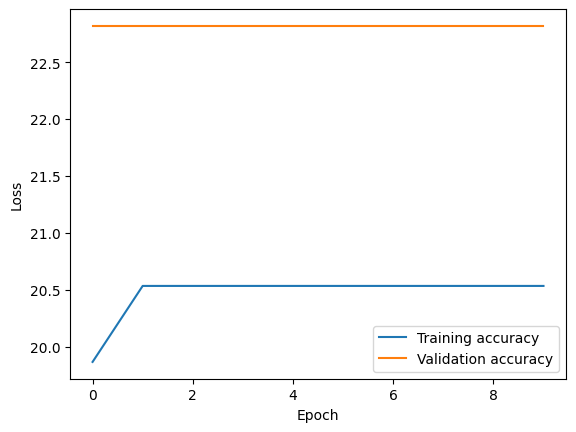

In [10]:
train_data,val_data = random_split(data_set, [0.8, 0.2])

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)



device = 'cuda' 
model_7 = CNN7().to(device)

optimizer = optim.Adam(model_7.parameters(), lr=1e-4)
num_epochs = 10
training_losses = []
training_accuracies = []
validation_losses = []
validation_accuracies = []
for epoch in range(num_epochs):
    model_7.train()
    train_correct = 0
    train_total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        #optimizer.zero_grad()  # Clear gradients
        outputs = model_7(images)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    training_losses.append(loss.item())
    training_accuracies.append(100 * train_correct / train_total)

    # Validation loop
    model_7.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model_7(images)
            loss = F.cross_entropy(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    validation_losses.append(val_loss / len(val_loader))
    validation_accuracies.append(100 * val_correct / val_total)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {loss.item():.4f}, Training Accuracy: {100 * train_correct / train_total:.2f}%, Validation Loss: {val_loss / len(val_loader):.4f}, Validation Accuracy: {100 * val_correct / val_total:.2f}%')


plt.plot(training_accuracies, label='Training accuracy')
plt.plot(validation_accuracies, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()